<a href="https://colab.research.google.com/github/AnanLu/hydrocode/blob/main/Q3/3_1D_hydro_solver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [26]:
#grid of space
Ngrid = 100
#grid of time
Nsteps = 2000

#dt, dx and cs selected w/ trial and error to ensure stability 
#and to better visualize
dt = 0.1
dx = 1
cs = 1
cs_1 = 0.5
cs_2 = 1.2

#gaussian cofficients
a1 = 0.5 #peak percentage
a2 = 0.2
a3 = 0.9
c = 50 #position of peak
sigma1 = 10 #width of blob
sigma2 = 5
sigma3 = 20

#setting up common initial condition
x = np.arange(Ngrid)*dx
u_1 = np.zeros(Ngrid+1)
J1_1 = np.zeros(Ngrid+1)
J2_1 = np.zeros(Ngrid+1)
u_2 = np.zeros(Ngrid+1)
J1_2 = np.zeros(Ngrid+1)
J2_2 = np.zeros(Ngrid+1)
u_3 = np.zeros(Ngrid+1)
J1_3 = np.zeros(Ngrid+1)
J2_3 = np.zeros(Ngrid+1)
u_4 = np.zeros(Ngrid+1)
J1_4 = np.zeros(Ngrid+1)
J2_4 = np.zeros(Ngrid+1)
u_5 = np.zeros(Ngrid+1)
J1_5 = np.zeros(Ngrid+1)
J2_5 = np.zeros(Ngrid+1)
u_6 = np.zeros(Ngrid+1)
J1_6 = np.zeros(Ngrid+1)
J2_6 = np.zeros(Ngrid+1)
u_7 = np.zeros(Ngrid+1)
J1_7 = np.zeros(Ngrid+1)
J2_7 = np.zeros(Ngrid+1)

#setting up initial f1 f2 for tests
#test 1
f1_1 = a1*np.exp(-(x-c)**2/sigma1**2)
f2_1 = f1_1.copy()
#test 2
f1_2 = a2*np.exp(-(x-c)**2/sigma1**2)
f2_2 = f1_2.copy()
#test 3
f1_3 = a3*np.exp(-(x-c)**2/sigma1**2)
f2_3 = f1_3.copy()
#test 4
f1_4 = a1*np.exp(-(x-c)**2/sigma2**2)
f2_4 = f1_4.copy()
#test 5
f1_5 = a1*np.exp(-(x-c)**2/sigma3**2)
f2_5 = f1_5.copy()
#test 6
f1_6 = a1*np.exp(-(x-c)**2/sigma1**2)
f2_6 = f1_6.copy()
#test 7
f1_7 = a1*np.exp(-(x-c)**2/sigma1**2)
f2_7 = f1_7.copy()


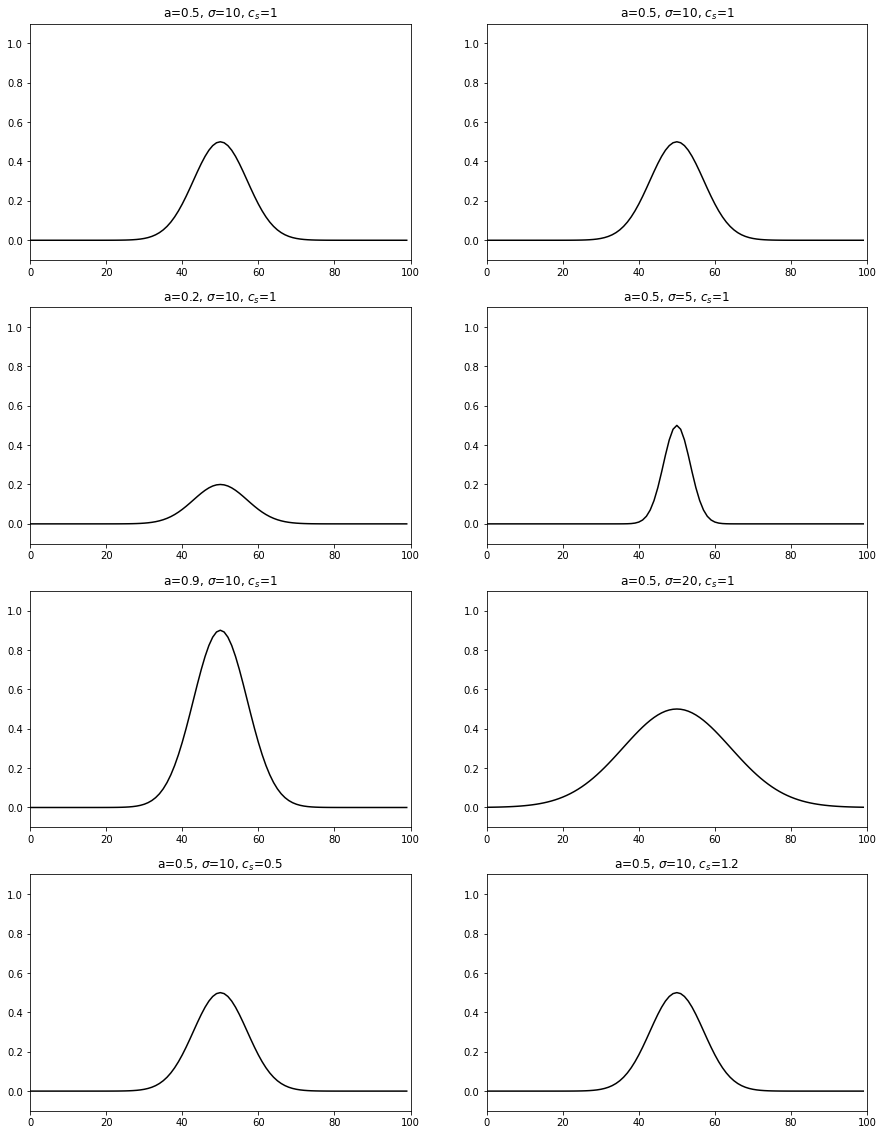

In [27]:
#set up plot

fig, axes = plt.subplots(4,2, figsize=(15, 20))
axes[0,0].set_title('a=0.5, $\sigma$=10, $c_s$=1')
axes[0,1].set_title('a=0.5, $\sigma$=10, $c_s$=1')
axes[1,0].set_title('a=0.2, $\sigma$=10, $c_s$=1')
axes[1,1].set_title('a=0.5, $\sigma$=5, $c_s$=1')
axes[2,0].set_title('a=0.9, $\sigma$=10, $c_s$=1')
axes[2,1].set_title('a=0.5, $\sigma$=20, $c_s$=1')
axes[3,0].set_title('a=0.5, $\sigma$=10, $c_s$=0.5')
axes[3,1].set_title('a=0.5, $\sigma$=10, $c_s$=1.2')


axes[0,0].plot(x,f1_1,'k-')
axes[0,1].plot(x,f1_1,'k-')
axes[1,0].plot(x,f1_2,'k-')
axes[1,1].plot(x,f1_4,'k-')
axes[2,0].plot(x,f1_3,'k-')
axes[2,1].plot(x,f1_5,'k-')
axes[3,0].plot(x,f1_6,'k-')
axes[3,1].plot(x,f1_6,'k-')

axes[0,0].set_xlim([0,Ngrid])
axes[0,1].set_xlim([0,Ngrid])
axes[1,0].set_xlim([0,Ngrid])
axes[1,1].set_xlim([0,Ngrid])
axes[2,0].set_xlim([0,Ngrid])
axes[2,1].set_xlim([0,Ngrid])
axes[3,0].set_xlim([0,Ngrid])
axes[3,1].set_xlim([0,Ngrid])

axes[0,0].set_ylim([-0.1,1.1])
axes[0,1].set_ylim([-0.1,1.1])
axes[1,0].set_ylim([-0.1,1.1])
axes[1,1].set_ylim([-0.1,1.1])
axes[2,0].set_ylim([-0.1,1.1])
axes[2,1].set_ylim([-0.1,1.1])
axes[3,0].set_ylim([-0.1,1.1])
axes[3,1].set_ylim([-0.1,1.1])


line1, = axes[0,0].plot([], [], 'ro', lw=2)
line2, = axes[0,1].plot([], [], 'ro', lw=2)
line3, = axes[1,0].plot([], [], 'ro', lw=2)
line4, = axes[1,1].plot([], [], 'ro', lw=2)
line5, = axes[2,0].plot([], [], 'ro', lw=2)
line6, = axes[2,1].plot([], [], 'ro', lw=2)
line7, = axes[3,0].plot([], [], 'ro', lw=2)
line8, = axes[3,1].plot([], [], 'ro', lw=2)

In [28]:
# initialization function: set-up initial function for animation
def init():

    #setting up common initial condition
    x = np.arange(Ngrid)*dx
    u = np.zeros(Ngrid+1)
    J1 = np.zeros(Ngrid+1)
    J2 = np.zeros(Ngrid+1)

    #setting up initial f1 f2 for tests
    #test 1
    f1_1 = a1*np.exp(-(x-c)**2/sigma1**2)
    f2_1 = f1_1.copy()
    #test 2
    f1_2 = a2*np.exp(-(x-c)**2/sigma1**2)
    f2_2 = f1_2.copy()
    #test 3
    f1_3 = a3*np.exp(-(x-c)**2/sigma1**2)
    f2_3 = f1_3.copy()
    #test 4
    f1_4 = a1*np.exp(-(x-c)**2/sigma2**2)
    f2_4 = f1_4.copy()
    #test 5
    f1_5 = a1*np.exp(-(x-c)**2/sigma3**2)
    f2_5 = f1_5.copy()
    
    return (line1, line2, line3, line4, line5, line6, line7, line8)

In [29]:
# animation function: 
#this is basically a for loop updated in the animation function
def animate(i):

    #update u (velocity) except boundary
    u_1[1:-2] = 0.5*(f2_1[0:-2]/f1_1[0:-2] + f2_1[1:-1]/f1_1[1:-1])
    u_2[1:-2] = 0.5*(f2_2[0:-2]/f1_2[0:-2] + f2_2[1:-1]/f1_2[1:-1])
    u_3[1:-2] = 0.5*(f2_3[0:-2]/f1_3[0:-2] + f2_3[1:-1]/f1_3[1:-1])
    u_4[1:-2] = 0.5*(f2_4[0:-2]/f1_4[0:-2] + f2_4[1:-1]/f1_4[1:-1])
    u_5[1:-2] = 0.5*(f2_5[0:-2]/f1_5[0:-2] + f2_5[1:-1]/f1_5[1:-1])
    u_6[1:-2] = 0.5*(f2_6[0:-2]/f1_6[0:-2] + f2_6[1:-1]/f1_6[1:-1])
    u_7[1:-2] = 0.5*(f2_7[0:-2]/f1_7[0:-2] + f2_7[1:-1]/f1_7[1:-1])

    #update j (flux) except boundary
    for j in np.arange(1,Ngrid):
      if u_1[j]>0:
        J1_1[j] = u_1[j]*f1_1[j-1]
        J2_1[j] = u_1[j]*f2_1[j-1]
      else:
        J1_1[j] = u_1[j]*f1_1[j]
        J2_1[j] = u_1[j]*f2_1[j]

    for j in np.arange(1,Ngrid):
      if u_2[j]>0:
        J1_2[j] = u_2[j]*f1_2[j-1]
        J2_2[j] = u_2[j]*f2_2[j-1]
      else:
        J1_2[j] = u_2[j]*f1_2[j]
        J2_2[j] = u_2[j]*f2_2[j]
    
    for j in np.arange(1,Ngrid):
      if u_3[j]>0:
        J1_3[j] = u_3[j]*f1_3[j-1]
        J2_3[j] = u_3[j]*f2_3[j-1]
      else:
        J1_3[j] = u_3[j]*f1_3[j]
        J2_3[j] = u_3[j]*f2_3[j]

    for j in np.arange(1,Ngrid):
      if u_4[j]>0:
        J1_4[j] = u_4[j]*f1_4[j-1]
        J2_4[j] = u_4[j]*f2_4[j-1]
      else:
        J1_4[j] = u_4[j]*f1_4[j]
        J2_4[j] = u_4[j]*f2_4[j]

    for j in np.arange(1,Ngrid):
      if u_5[j]>0:
        J1_5[j] = u_5[j]*f1_5[j-1]
        J2_5[j] = u_5[j]*f2_5[j-1]
      else:
        J1_5[j] = u_5[j]*f1_5[j]
        J2_5[j] = u_5[j]*f2_5[j]

    for j in np.arange(1,Ngrid):
      if u_6[j]>0:
        J1_6[j] = u_6[j]*f1_6[j-1]
        J2_6[j] = u_6[j]*f2_6[j-1]
      else:
        J1_6[j] = u_6[j]*f1_6[j]
        J2_6[j] = u_6[j]*f2_6[j]

    for j in np.arange(1,Ngrid):
      if u_7[j]>0:
        J1_7[j] = u_7[j]*f1_7[j-1]
        J2_7[j] = u_7[j]*f2_7[j-1]
      else:
        J1_7[j] = u_7[j]*f1_7[j]
        J2_7[j] = u_7[j]*f2_7[j]
  

    #update f1(density) except boundary
    f1_1[1:Ngrid-1] = f1_1[1:Ngrid-1] - dt/dx*(J1_1[2:Ngrid]-J1_1[1:Ngrid-1])
    f1_2[1:Ngrid-1] = f1_2[1:Ngrid-1] - dt/dx*(J1_2[2:Ngrid]-J1_2[1:Ngrid-1])
    f1_3[1:Ngrid-1] = f1_3[1:Ngrid-1] - dt/dx*(J1_3[2:Ngrid]-J1_3[1:Ngrid-1])
    f1_4[1:Ngrid-1] = f1_4[1:Ngrid-1] - dt/dx*(J1_4[2:Ngrid]-J1_4[1:Ngrid-1])
    f1_5[1:Ngrid-1] = f1_5[1:Ngrid-1] - dt/dx*(J1_5[2:Ngrid]-J1_5[1:Ngrid-1])
    f1_6[1:Ngrid-1] = f1_6[1:Ngrid-1] - dt/dx*(J1_6[2:Ngrid]-J1_6[1:Ngrid-1])
    f1_7[1:Ngrid-1] = f1_7[1:Ngrid-1] - dt/dx*(J1_7[2:Ngrid]-J1_7[1:Ngrid-1])

    #boundary condition of f1(density)
    f1_1[0] = f1_1[0] - dt/dx*J1_1[1]
    f1_1[-1] = f1_1[-1] + dt/dx*J1_1[-2]
    f1_2[0] = f1_2[0] - dt/dx*J1_2[1]
    f1_2[-1] = f1_2[-1] + dt/dx*J1_2[-2]
    f1_3[0] = f1_3[0] - dt/dx*J1_3[1]
    f1_3[-1] = f1_3[-1] + dt/dx*J1_3[-2]
    f1_4[0] = f1_4[0] - dt/dx*J1_4[1]
    f1_4[-1] = f1_4[-1] + dt/dx*J1_4[-2]
    f1_5[0] = f1_5[0] - dt/dx*J1_5[1]
    f1_5[-1] = f1_5[-1] + dt/dx*J1_5[-2]
    f1_6[0] = f1_6[0] - dt/dx*J1_6[1]
    f1_6[-1] = f1_6[-1] + dt/dx*J1_6[-2]
    f1_7[0] = f1_7[0] - dt/dx*J1_7[1]
    f1_7[-1] = f1_7[-1] + dt/dx*J1_7[-2]

    #update f2(momentum) except boundary
    f2_1[1:Ngrid-1] = f2_1[1:Ngrid-1] - dt/dx*(J2_1[2:Ngrid]-J2_1[1:Ngrid-1])
    f2_2[1:Ngrid-1] = f2_2[1:Ngrid-1] - dt/dx*(J2_2[2:Ngrid]-J2_2[1:Ngrid-1])
    f2_3[1:Ngrid-1] = f2_3[1:Ngrid-1] - dt/dx*(J2_3[2:Ngrid]-J2_3[1:Ngrid-1])
    f2_4[1:Ngrid-1] = f2_4[1:Ngrid-1] - dt/dx*(J2_4[2:Ngrid]-J2_4[1:Ngrid-1])
    f2_5[1:Ngrid-1] = f2_5[1:Ngrid-1] - dt/dx*(J2_5[2:Ngrid]-J2_5[1:Ngrid-1])
    f2_6[1:Ngrid-1] = f2_6[1:Ngrid-1] - dt/dx*(J2_6[2:Ngrid]-J2_6[1:Ngrid-1])
    f2_7[1:Ngrid-1] = f2_7[1:Ngrid-1] - dt/dx*(J2_7[2:Ngrid]-J2_7[1:Ngrid-1])
    #update f2(momentum) with pressure except boundary
    f2_1[1:Ngrid-1] = f2_1[1:Ngrid-1] - dt/dx*cs**2*(f1_1[2:Ngrid]-f1_1[0:Ngrid-2])
    f2_2[1:Ngrid-1] = f2_2[1:Ngrid-1] - dt/dx*cs**2*(f1_2[2:Ngrid]-f1_2[0:Ngrid-2])
    f2_3[1:Ngrid-1] = f2_3[1:Ngrid-1] - dt/dx*cs**2*(f1_3[2:Ngrid]-f1_3[0:Ngrid-2])
    f2_4[1:Ngrid-1] = f2_4[1:Ngrid-1] - dt/dx*cs**2*(f1_4[2:Ngrid]-f1_4[0:Ngrid-2])
    f2_5[1:Ngrid-1] = f2_5[1:Ngrid-1] - dt/dx*cs**2*(f1_5[2:Ngrid]-f1_5[0:Ngrid-2])
    f2_6[1:Ngrid-1] = f2_6[1:Ngrid-1] - dt/dx*cs_1**2*(f1_6[2:Ngrid]-f1_6[0:Ngrid-2])
    f2_7[1:Ngrid-1] = f2_7[1:Ngrid-1] - dt/dx*cs_2**2*(f1_7[2:Ngrid]-f1_7[0:Ngrid-2])

    #boundary condition of f2(momentum)
    f2_1[0] = f2_1[0] - dt/dx*J2_1[1]
    f2_1[-1] = f2_1[-1] + dt/dx*J2_1[-2]
    f2_2[0] = f2_2[0] - dt/dx*J2_2[1]
    f2_2[-1] = f2_2[-1] + dt/dx*J2_2[-2]
    f2_3[0] = f2_3[0] - dt/dx*J2_3[1]
    f2_3[-1] = f2_3[-1] + dt/dx*J2_3[-2]
    f2_4[0] = f2_4[0] - dt/dx*J2_4[1]
    f2_4[-1] = f2_4[-1] + dt/dx*J2_4[-2]
    f2_5[0] = f2_5[0] - dt/dx*J2_5[1]
    f2_5[-1] = f2_5[-1] + dt/dx*J2_5[-2]
    f2_6[0] = f2_6[0] - dt/dx*J2_6[1]
    f2_6[-1] = f2_6[-1] + dt/dx*J2_6[-2]
    f2_7[0] = f2_7[0] - dt/dx*J2_7[1]
    f2_7[-1] = f2_7[-1] + dt/dx*J2_7[-2]

    line1.set_data(x, f1_1)
    line2.set_data(x, f1_1)
    line3.set_data(x, f1_2)
    line4.set_data(x, f1_4)
    line5.set_data(x, f1_3)
    line6.set_data(x, f1_5)
    line7.set_data(x, f1_6)
    line8.set_data(x, f1_7)
    
    return (line1, line2, line3, line4, line5, line6, line7, line8)

In [30]:
# call the animator. blit=True means only re-draw the parts that have changed.
# frames=Nsteps is the number of time steps
# interval is time delay in milisecond
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=Nsteps, interval=20, blit=True)

In [31]:
# run the animation code and can be saved as mp4
HTML(anim.to_html5_video())